### Predict Salary of NHL players 

1. Linear Regression                         (MSE Validation Set: 1.284)
2. Lasso Regression                          (MSE Validation Set: 1.342)
3. Deep Learning (All Variables)             (MSE Validation Set: 1.170)
4. Deep Learning (Importnant Variables)      (MSE Validation Set: 1.123)

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
cap_2017 = pd.read_csv('CapData_2017.csv')
cap_2016 = pd.read_csv('CapData_2016.csv')
cap_2015 = pd.read_csv('CapData_2015.csv')
cap_2014 = pd.read_csv('CapData_2014.csv')

In [3]:
cap_2017.head()

,PLAYER,TEAM,CLAUSE,EXPIRY,AGE,POS,Unnamed: 6,GP,G,A,...,+/-,TOI,W,L,SO,GAA,Sv%,Unnamed: 18,SALARY,CAP HIT ▾
0,1. Patrick Kane,Chicago Blackhawks,NMC,UFA,28,"RW, C",NaN,82,34,55,...,11,21:23,-,-,-,-,-,NaN,"$13,800,000","$10,500,000"
1,2. Jonathan Toews,Chicago Blackhawks,NMC,UFA,29,C,NaN,72,21,37,...,7,20:09,-,-,-,-,-,NaN,"$13,800,000","$10,500,000"
2,3. Anze Kopitar,Los Angeles Kings,NMC,UFA,29,C,NaN,76,12,40,...,-10,20:45,-,-,-,-,-,NaN,"$14,000,000","$10,000,000"
3,4. Alex Ovechkin,Washington Capitals,M-NTC,UFA,31,"LW, RW",NaN,82,33,36,...,6,18:21,-,-,-,-,-,NaN,"$10,000,000","$9,538,462"
4,5. Evgeni Malkin,Pittsburgh Penguins,NMC,UFA,30,"C, RW",NaN,62,33,39,...,18,18:37,-,-,-,-,-,NaN,"$9,500,000","$9,500,000"


In [4]:
del cap_2017['Unnamed: 6']
del cap_2017['Unnamed: 18']

del cap_2016['Unnamed: 6']
del cap_2016['Unnamed: 18']

del cap_2015['Unnamed: 6']
del cap_2015['Unnamed: 18']

del cap_2014['Unnamed: 6']
del cap_2014['Unnamed: 18']

In [5]:
def remove_index_from_name(string1):
    space = string1.index(' ')
    return string1[space+1:]
def convert_salary(string1):
    string1 = string1.replace(',', '')
    return round(int(string1[1:])/float(1000000),3)

In [6]:
cap_2016.head()

,PLAYER,TEAM,CLAUSE,EXPIRY,AGE,POS,GP,G,A,P,+/-,TOI,W,L,SO,GAA,Sv%,SALARY,CAP HIT ▾
0,1. Patrick Kane,Chicago Blackhawks,NMC,UFA,28,"RW, C",82,46,60,106,17,20:24,-,-,-,-,-,"$13,800,000","$10,500,000"
1,2. Jonathan Toews,Chicago Blackhawks,NMC,UFA,29,C,80,28,30,58,16,19:14,-,-,-,-,-,"$13,800,000","$10,500,000"
2,3. Alex Ovechkin,Washington Capitals,M-NTC,UFA,31,"LW, RW",79,50,21,71,21,20:18,-,-,-,-,-,"$10,000,000","$9,538,462"
3,4. Evgeni Malkin,Pittsburgh Penguins,NMC,UFA,30,"C, RW",57,27,31,58,1,19:22,-,-,-,-,-,"$9,500,000","$9,500,000"
4,5. P.K. Subban,Nashville Predators,NaN,UFA,28,D,68,6,45,51,4,26:21,-,-,-,-,-,"$7,000,000","$9,000,000"


In [7]:
cap_2017['PLAYER'] = cap_2017['PLAYER'].apply(remove_index_from_name)
cap_2016['PLAYER'] = cap_2016['PLAYER'].apply(remove_index_from_name)
cap_2015['PLAYER'] = cap_2015['PLAYER'].apply(remove_index_from_name)
cap_2014['PLAYER'] = cap_2014['PLAYER'].apply(remove_index_from_name)

cap_2017['SALARY'] = cap_2017['SALARY'].apply(convert_salary)
cap_2016['SALARY'] = cap_2016['SALARY'].apply(convert_salary)
cap_2015['SALARY'] = cap_2015['SALARY'].apply(convert_salary)
cap_2014['SALARY'] = cap_2014['SALARY'].apply(convert_salary)

cap_2017['CAP HIT ▾'] = cap_2017['CAP HIT ▾'].apply(convert_salary)
cap_2016['CAP HIT ▾'] = cap_2016['CAP HIT ▾'].apply(convert_salary)
cap_2015['CAP HIT ▾'] = cap_2015['CAP HIT ▾'].apply(convert_salary)
cap_2014['CAP HIT ▾'] = cap_2014['CAP HIT ▾'].apply(convert_salary)

In [12]:
salary_2016 = dict(zip(cap_2016['PLAYER'],cap_2016['CAP HIT ▾']))
salary_2015 = dict(zip(cap_2015['PLAYER'],cap_2015['CAP HIT ▾']))
salary_2014 = dict(zip(cap_2014['PLAYER'],cap_2014['CAP HIT ▾']))
salary_2017 = dict(zip(cap_2017['PLAYER'],cap_2017['CAP HIT ▾']))

In [13]:
from collections import defaultdict
contract_dict=defaultdict(list)

In [14]:
def contract_year(this_year, next_year, year,contract_dict):
    for ith in next_year:
        if ith in this_year:
            if this_year[ith] != next_year[ith]:
                contract_dict[ith].append(year)
        else:
            contract_dict[ith].append(year)
    return contract_dict

In [15]:
contract_dict = contract_year(salary_2014, salary_2015, 2015, contract_dict)
contract_dict = contract_year(salary_2015, salary_2016, 2016, contract_dict)
contract_dict = contract_year(salary_2016, salary_2017, 2017, contract_dict)

In [18]:
def data_years(cap_year, year):
    data_list=[]
    for ith in range(cap_year.shape[0]):
        if cap_year.PLAYER[ith] in contract_dict:
            if year in contract_dict[cap_year.PLAYER[ith]]:
                data_list.append(cap_year.loc[ith]) 
    data = pd.DataFrame(data_list)
    data['year'] = year
    return data

In [19]:
data_2015 = data_years(cap_2015, 2015)
data_2016 = data_years(cap_2016, 2016)
data_2017 = data_years(cap_2015, 2017)


In [20]:
salary_contract=data_2015.append(data_2016).append(data_2017)

In [21]:
salary_contract = salary_contract.reset_index(drop = True)

In [22]:
salary_contract.head()

,PLAYER,TEAM,CLAUSE,EXPIRY,AGE,POS,GP,G,A,P,+/-,TOI,W,L,SO,GAA,Sv%,SALARY,CAP HIT ▾,year
0,Evgeni Malkin,Pittsburgh Penguins,NMC,UFA,30,"C, RW",69,28,42,70,-2,18:58,-,-,-,-,-,9.5,9.500,2015
1,P.K. Subban,Nashville Predators,NaN,UFA,28,D,82,15,45,60,21,26:12,-,-,-,-,-,7.0,9.000,2015
2,Henrik Lundqvist,New York Rangers,NMC,UFA,35,G,46,-,-,-,-,-,30,13,5,2.25,.922,11.0,8.500,2015
3,Claude Giroux,Philadelphia Flyers,NaN,UFA,29,"C, RW",81,25,48,73,-3,20:33,-,-,-,-,-,10.0,8.275,2015
4,Phil Kessel,Pittsburgh Penguins,"M-NTC, NMC",UFA,29,RW,82,25,36,61,-34,18:47,-,-,-,-,-,10.0,8.000,2015


In [23]:
salary_contract.year = salary_contract.year.astype(int)

In [24]:
salary_contract_2017 = salary_contract[salary_contract['year']==2017].reset_index(drop=True)
salary_contract_2016 = salary_contract[salary_contract['year']==2016].reset_index(drop=True)
salary_contract_2015 = salary_contract[salary_contract['year']==2015].reset_index(drop=True)

In [25]:
salary_contract_2017.head()

,PLAYER,TEAM,CLAUSE,EXPIRY,AGE,POS,GP,G,A,P,+/-,TOI,W,L,SO,GAA,Sv%,SALARY,CAP HIT ▾,year
0,Eric Staal,Minnesota Wild,NTC,UFA,32,C,77,23,31,54,-13,18:50,-,-,-,-,-,9.25,8.25,2017
1,Steven Stamkos,Tampa Bay Lightning,NaN,UFA,27,C,82,43,29,72,2,19:22,-,-,-,-,-,8.00,7.50,2017
2,Anze Kopitar,Los Angeles Kings,NaN,UFA,29,C,79,16,48,64,-2,19:23,-,-,-,-,-,7.50,6.80,2017
3,Thomas Vanek,Chicago Blackhawks,NMC,UFA,33,"LW, RW",80,21,31,52,-6,16:12,-,-,-,-,-,5.50,6.50,2017
4,Cam Ward,Detroit Red Wings,NTC,UFA,33,G,51,-,-,-,-,-,22,24,1,2.40,.910,6.70,6.30,2017


In [26]:
salary_contract_2017 = salary_contract_2017[['PLAYER','AGE','CLAUSE','EXPIRY','SALARY','CAP HIT ▾','year']]
salary_contract_2016 = salary_contract_2016[['PLAYER','AGE','CLAUSE','EXPIRY','SALARY','CAP HIT ▾','year']]
salary_contract_2015 = salary_contract_2015[['PLAYER','AGE','CLAUSE','EXPIRY','SALARY','CAP HIT ▾','year']]

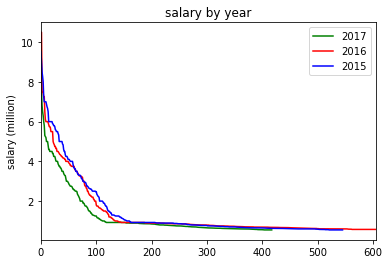

In [27]:
# ax = salary_contract[salary_contract['year']==2017].plot(y='CAP HIT ▾')
ax = salary_contract_2017.plot(y='CAP HIT ▾', color = 'green', kind = 'line', label = '2017')
salary_contract_2016.plot(y='CAP HIT ▾', color = 'red', kind = 'line', ax = ax, label = '2016')
salary_contract_2015.plot(y='CAP HIT ▾', color = 'blue', kind = 'line', ax = ax, label = '2015')
plt.legend(loc = 'upper right')
plt.title('salary by year')
plt.ylabel('salary (million)')
plt.show()

In [28]:
len(salary_contract['PLAYER'].values)

1570

In [29]:
stats_2011_14=pd.read_csv('PuckalyticsSkaterStats-2011-14-5vs5.csv')
stats_2012_15=pd.read_csv('PuckalyticsSkaterStats-2012-15-5vs5.csv')
stats_2013_16=pd.read_csv('PuckalyticsSkaterStats-2013-16-5vs5.csv')

In [30]:
stats_2013_16['Name'] =  stats_2013_16['FirstName'] + ' ' + stats_2013_16['LastName'] 
stats_2012_15['Name'] =  stats_2012_15['FirstName'] + ' ' + stats_2012_15['LastName'] 
stats_2011_14['Name'] =  stats_2011_14['FirstName'] + ' ' + stats_2011_14['LastName'] 

In [31]:
def name_clean(string): 
#     print(string)
    string = string[1:]
    return string.lower().title()


In [32]:
stats_2013_16['Name'] = stats_2013_16['Name'].apply(name_clean)
stats_2012_15['Name'] = stats_2012_15['Name'].apply(name_clean)
stats_2011_14['Name'] = stats_2011_14['Name'].apply(name_clean)

In [33]:
stats_2013_16.loc[72,'Name']

'Eric Staal'

In [34]:
salary_contract_2017.shape
salary_contract_2016.head(20)

,PLAYER,AGE,CLAUSE,EXPIRY,SALARY,CAP HIT ▾,year
0,Patrick Kane,28,NMC,UFA,13.80,10.500,2016
1,Jonathan Toews,29,NMC,UFA,13.80,10.500,2016
2,Jason Spezza,34,NMC,UFA,7.50,7.500,2016
3,Vladimir Tarasenko,25,NaN,UFA,8.00,7.500,2016
4,Sergei Bobrovsky,28,NaN,UFA,8.50,7.425,2016
5,Bobby Ryan,30,"M-NTC, NMC",UFA,6.50,7.250,2016
6,David Krejci,31,NMC,UFA,7.25,7.250,2016
7,Derek Stepan,27,NaN,UFA,8.00,6.500,2016
8,Braden Holtby,27,NaN,UFA,6.50,6.100,2016
9,Brandon Saad,24,NaN,UFA,4.00,6.000,2016


In [35]:
# A.merge(B, left_on='lkey', right_on='rkey', how='outer')

In [36]:
salary_2017 = salary_contract_2017.merge(stats_2013_16, left_on = 'PLAYER', right_on = 'Name', how = 'inner')
salary_2016 = salary_contract_2016.merge(stats_2012_15, left_on = 'PLAYER', right_on = 'Name', how = 'inner')
salary_2015 = salary_contract_2015.merge(stats_2011_14, left_on = 'PLAYER', right_on = 'Name', how = 'inner')

In [37]:
print(salary_2015.shape)
print(salary_2016.shape)
print(salary_2017.shape)

(225, 105)
(243, 105)
(301, 105)


In [38]:
salary_all=salary_2015.append(salary_2016).append(salary_2017)

In [39]:
salary_all.head()

,PLAYER,AGE,CLAUSE,EXPIRY,SALARY,CAP HIT ▾,year,Rank,LastName,FirstName,...,IPP,IPPP,TotFO,NZFO,DZFO,OZFO,NZFO%,DZFO%,OZFO%,Name
0,Evgeni Malkin,30,NMC,UFA,9.50,9.500,2015,60,MALKIN,EVGENI,...,81.12,69.23,2228,816,527,885,36.6248,23.6535,39.7217,Evgeni Malkin
1,P.K. Subban,28,NaN,UFA,7.00,9.000,2015,330,SUBBAN,P.K.,...,33.55,21.05,3572,1376,1149,1047,38.5218,32.1669,29.3113,P.K. Subban
2,Claude Giroux,29,NaN,UFA,10.00,8.275,2015,223,GIROUX,CLAUDE,...,75.51,57.82,3052,1086,970,996,35.5832,31.7824,32.6343,Claude Giroux
3,Phil Kessel,29,"M-NTC, NMC",UFA,10.00,8.000,2015,758,KESSEL,PHIL,...,78.95,64.91,3174,1129,1075,970,35.5703,33.8689,30.5608,Phil Kessel
4,Kris Letang,30,"M-NTC, NMC",UFA,7.25,7.250,2015,209,LETANG,KRIS,...,43.10,25.86,2007,772,602,633,38.4654,29.9950,31.5396,Kris Letang


In [104]:
# list(quant_all.columns)

##### Extract Quantitative Variable

In [63]:
quant_all = salary_all.loc[:, (salary_all.dtypes ==int) | (salary_all.dtypes ==float) ]

In [64]:
quant_list = list(quant_all.columns)
quant_list.remove('CAP HIT ▾')
quant_list.remove('SALARY')

In [105]:
y = quant_all['SALARY'].values
X = quant_all.drop(['SALARY', 'CAP HIT ▾'], axis = 1).values

##### check outliers

In [106]:
y[y<0]

array([], dtype=float64)

In [107]:
y[y>14]

array([], dtype=float64)

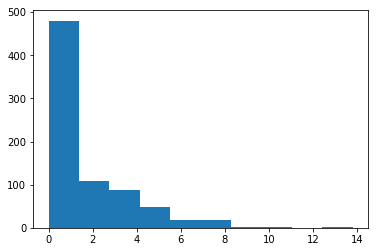

In [108]:
plt.hist(y)
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [110]:
from sklearn.model_selection import cross_val_score

### Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize=True)
lr_train = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_test, y_pred)

1.2840147790922452

### Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

for alpha in [ 0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    lasso = Lasso(normalize=True, alpha=alpha)
    lasso_train = lasso.fit(X_train, y_train)
    y_pred = lasso_train.predict(X_test)
    print mean_squared_error(y_test, y_pred)

1.2562531755
1.25762694679
1.26040042931
1.28934931087
1.29698370309
1.29897327262
1.34190896468
1.5628952159
1.67434810244
3.23113032242
3.51192013938
3.51192013938


In [113]:
lasso = Lasso(normalize=True, alpha=0.001)
lasso_train = lasso.fit(X_train, y_train)
y_pred = lasso_train.predict(X_test)
print mean_squared_error(y_test, y_pred)

1.34190896468


In [114]:
X_small = X[: , lasso_train.coef_ != 0]

In [116]:
X_small.shape

(769, 22)

In [127]:
list(quant_all.drop(['SALARY', 'CAP HIT ▾'], axis = 1).ix[:, lasso_train.coef_ != 0].columns)

/home/tmatsuzawa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


['AGE',
 'year',
 'GP',
 'GF',
 'Opp GA60',
 'SF',
 'Sh%',
 'TM Sv%',
 'Sv% Rel',
 'Opp Sh%',
 'CA60 RelTM',
 'TM CSh%',
 'Opp CSh%',
 'Opp CSv%',
 '%ofTeam OZFO',
 '%ofTeam DZFO',
 '%ofTeam NZFO',
 'FirstA',
 'Pts',
 'Pri. Pts',
 'iCorsi',
 'NZFO']

### Deep Learning (All Variables)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)
standardized_X_train.shape

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=standardized_X_train.shape[1]))
# model.add(Dense(16, activation='relu', input_dim=96))
model.add(Dense(1, activation='linear'))
early_stopping_monitor = EarlyStopping(patience=5)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(standardized_X_train, y_train, validation_data= (standardized_X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])
y_pred = model.predict(standardized_X_test)
print mean_squared_error(y_test, y_pred)

Train on 576 samples, validate on 193 samples
Epoch 1/100
576/576 [==============================] - 0s - loss: 6.1105 - val_loss: 2.9824
Epoch 2/100
576/576 [==============================] - 0s - loss: 2.2342 - val_loss: 1.4757
Epoch 3/100
576/576 [==============================] - 0s - loss: 1.6431 - val_loss: 1.3245
Epoch 4/100
576/576 [==============================] - 0s - loss: 1.4745 - val_loss: 1.2919
Epoch 5/100
576/576 [==============================] - 0s - loss: 1.3753 - val_loss: 1.2839
Epoch 6/100
576/576 [==============================] - 0s - loss: 1.3148 - val_loss: 1.2561
Epoch 7/100
576/576 [==============================] - 0s - loss: 1.2795 - val_loss: 1.2311
Epoch 8/100
576/576 [==============================] - 0s - loss: 1.2418 - val_loss: 1.2610
Epoch 9/100
576/576 [==============================] - 0s - loss: 1.2056 - val_loss: 1.2328
Epoch 10/100
576/576 [==============================] - 0s - loss: 1.1816 - val_loss: 1.2267
Epoch 11/100
576/576 [===========

### Deep Learning (small variables)

#### Only use significant vairiables based on lasso regression

In [118]:
X_small_train, X_small_test, y_train, y_test = train_test_split(X_small, y, test_size=0.25, random_state=40)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_small_train)
standardized_X_train = scaler.transform(X_small_train)
standardized_X_test = scaler.transform(X_small_test)
standardized_X_train.shape

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_small.shape[1]))
# model.add(Dense(16, activation='relu', input_dim=96))
model.add(Dense(1, activation='linear'))
early_stopping_monitor = EarlyStopping(patience=5)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(standardized_X_train, y_train, validation_data= (standardized_X_test, y_test), epochs=150, batch_size=32, callbacks=[early_stopping_monitor])
y_pred = model.predict(standardized_X_test)
print mean_squared_error(y_test, y_pred)

Train on 576 samples, validate on 193 samples
Epoch 1/150
576/576 [==============================] - 0s - loss: 8.9713 - val_loss: 6.6537
Epoch 2/150
576/576 [==============================] - 0s - loss: 6.2749 - val_loss: 4.6781
Epoch 3/150
576/576 [==============================] - 0s - loss: 4.2542 - val_loss: 3.2197
Epoch 4/150
576/576 [==============================] - 0s - loss: 2.8510 - val_loss: 2.2218
Epoch 5/150
576/576 [==============================] - 0s - loss: 1.9577 - val_loss: 1.6952
Epoch 6/150
576/576 [==============================] - 0s - loss: 1.5426 - val_loss: 1.5031
Epoch 7/150
576/576 [==============================] - 0s - loss: 1.4128 - val_loss: 1.4426
Epoch 8/150
576/576 [==============================] - 0s - loss: 1.3683 - val_loss: 1.4178
Epoch 9/150
576/576 [==============================] - 0s - loss: 1.3429 - val_loss: 1.4076
Epoch 10/150
576/576 [==============================] - 0s - loss: 1.3173 - val_loss: 1.3916
Epoch 11/150
576/576 [===========